In [1]:
import pandas as pd

# Baca dataset asli
df = pd.read_csv('dataset_asli.csv')  # Sesuaikan nama file

# Buat dataset gabungan untuk training Naive Bayes
data_gabungan = []

# Loop setiap baris untuk mengambil hoaks dan fakta
for idx, row in df.iterrows():
    # Tambahkan data HOAKS
    if pd.notna(row['title_hoaks']):
        data_gabungan.append({
            'id': f"hoaks_{idx+1}",
            'title': row['title_hoaks'],
            'content': row['penjelasan_hoaks'],
            'kategori': 'hoaks',
            'id_pasangan': f"fakta_{idx+1}"  # Link ke fakta pasangannya
        })
    
    # Tambahkan data FAKTA
    if pd.notna(row['title_fakta']):
        data_gabungan.append({
            'id': f"fakta_{idx+1}",
            'title': row['title_fakta'],
            'content': row['penjelasan_fakta_terdekat'],
            'kategori': 'fakta',
            'id_pasangan': f"hoaks_{idx+1}"  # Link ke hoaks pasangannya
        })

# Buat DataFrame baru
df_gabungan = pd.DataFrame(data_gabungan)

# Hapus baris yang kosong (jika ada)
df_gabungan = df_gabungan.dropna(subset=['title', 'content'])

# Cek distribusi data
print("="*50)
print("DISTRIBUSI DATA:")
print("="*50)
print(df_gabungan['kategori'].value_counts())
print(f"\nTotal data: {len(df_gabungan)}")
print(f"Jumlah hoaks: {len(df_gabungan[df_gabungan['kategori']=='hoaks'])}")
print(f"Jumlah fakta: {len(df_gabungan[df_gabungan['kategori']=='fakta'])}")

# Tampilkan sample data
print("\n" + "="*50)
print("SAMPLE DATA:")
print("="*50)
print(df_gabungan.head(4))

# Simpan ke CSV baru
df_gabungan.to_csv('dataset_gabungan_training.csv', index=False, encoding='utf-8-sig')
print("\n✅ Dataset berhasil disimpan ke 'dataset_gabungan_training.csv'")

# BONUS: Buat juga versi untuk deployment (pisah tabel dengan relasi)
df_hoaks = df_gabungan[df_gabungan['kategori'] == 'hoaks'].copy()
df_fakta = df_gabungan[df_gabungan['kategori'] == 'fakta'].copy()

df_hoaks.to_csv('dataset_hoaks.csv', index=False, encoding='utf-8-sig')
df_fakta.to_csv('dataset_fakta.csv', index=False, encoding='utf-8-sig')
print("✅ Dataset hoaks disimpan ke 'dataset_hoaks.csv'")
print("✅ Dataset fakta disimpan ke 'dataset_fakta.csv'")

DISTRIBUSI DATA:
kategori
hoaks    731
fakta    730
Name: count, dtype: int64

Total data: 1461
Jumlah hoaks: 731
Jumlah fakta: 730

SAMPLE DATA:
        id                                              title  \
0  hoaks_1  [HOAKS] Presiden Prabowo Bebaskan Ammar Zoni d...   
1  fakta_1  5 Fakta Penangkapan Ammar Zoni yang Terjerat K...   
2  hoaks_2          [HOAKS] Tautan Pendaftaran Bansos Digital   
3  fakta_2  Bansos Siap Cair! Cek Nama Kamu di Cekbansos.k...   

                                             content kategori id_pasangan  
0  Penjelasan : Beredar sebuah unggahan video di ...    hoaks     fakta_1  
1  Aktor Ammar Zoni ditetapkan sebagai tersangka ...    fakta     hoaks_1  
2  Penjelasan : Beredar unggahan di media sosial ...    hoaks     fakta_2  
3  Pemerintah akan memberikan dua jenis bantuan s...    fakta     hoaks_2  

✅ Dataset berhasil disimpan ke 'dataset_gabungan_training.csv'
✅ Dataset hoaks disimpan ke 'dataset_hoaks.csv'
✅ Dataset fakta disimpan ke 'dataset

In [1]:
# ==========================================
# 1️⃣ Import Library
# ==========================================
import pandas as pd
import re
from tqdm import tqdm
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# ==========================================
# 2️⃣ Load Dataset
# ==========================================
# Ganti path sesuai lokasi file kamu
df = pd.read_csv("dataset_gabungan_training.csv")

print("Jumlah data:", len(df))
print("Kolom:", list(df.columns))
print(df.head(3))

# ==========================================
# 3️⃣ Inisialisasi Stemmer & Stopword
# ==========================================
stemmer = StemmerFactory().create_stemmer()
stop_factory = StopWordRemoverFactory()
stopwords = set(stop_factory.get_stop_words())

# ==========================================
# 4️⃣ Fungsi Preprocessing
# ==========================================
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    # Lowercase
    text = text.lower()
    # Hapus karakter non-alfabet
    text = re.sub(r'[^a-z\s]', ' ', text)
    # Tokenisasi
    tokens = text.split()
    # Hapus stopword
    tokens = [t for t in tokens if t not in stopwords]
    # Stemming Bahasa Indonesia
    stemmed_tokens = [stemmer.stem(t) for t in tokens]
    # Gabungkan kembali ke kalimat
    return " ".join(stemmed_tokens)

# ==========================================
# 5️⃣ Proses Preprocessing Seluruh Data
# ==========================================
tqdm.pandas(desc="Preprocessing Teks")
df["cleaned_content"] = df["content"].progress_apply(preprocess_text)

# ==========================================
# 6️⃣ Simpan atau Lihat Hasil
# ==========================================
print("\nPreview hasil preprocessing:")
print(df[["kategori", "content", "cleaned_content"]].head(10))

# (Opsional) Simpan hasil ke file baru
df.to_csv("dataset_gabungan_cleaned.csv", index=False)
print("\n✅ Hasil preprocessing disimpan sebagai dataset_gabungan_cleaned.csv")

Jumlah data: 1461
Kolom: ['id', 'title', 'content', 'kategori', 'id_pasangan']
        id                                              title  \
0  hoaks_1  [HOAKS] Presiden Prabowo Bebaskan Ammar Zoni d...   
1  fakta_1  5 Fakta Penangkapan Ammar Zoni yang Terjerat K...   
2  hoaks_2          [HOAKS] Tautan Pendaftaran Bansos Digital   

                                             content kategori id_pasangan  
0  Penjelasan : Beredar sebuah unggahan video di ...    hoaks     fakta_1  
1  Aktor Ammar Zoni ditetapkan sebagai tersangka ...    fakta     hoaks_1  
2  Penjelasan : Beredar unggahan di media sosial ...    hoaks     fakta_2  


Preprocessing Teks: 100%|██████████| 1461/1461 [10:08<00:00,  2.40it/s]


Preview hasil preprocessing:
  kategori                                            content  \
0    hoaks  Penjelasan : Beredar sebuah unggahan video di ...   
1    fakta  Aktor Ammar Zoni ditetapkan sebagai tersangka ...   
2    hoaks  Penjelasan : Beredar unggahan di media sosial ...   
3    fakta  Pemerintah akan memberikan dua jenis bantuan s...   
4    hoaks  Penjelasan : Beredar unggahan di media sosial ...   
5    fakta  FIFA akan melakukan audit vanue perhelatan Pia...   
6    hoaks  Penjelasan : Beredar sebuah unggahan di media ...   
7    fakta  Menteri Keuangan Sri Mulyani kebingungan denga...   
8    hoaks  Penjelasan: Beredar sebuah unggahan di media s...   
9    fakta  Megawati Soekarnoputri meminta para kepala des...   

                                     cleaned_content  
0  jelas edar buah unggah video media sosial face...  
1  aktor ammar zoni tetap sangka milik sabu polis...  
2  jelas edar unggah media sosial isi taut daftar...  
3  perintah beri jenis bantu sosia

In [2]:
# ==========================================
# 1️⃣ Import Library TF-IDF & Cosine Similarity
# ==========================================
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# ==========================================
# 2️⃣ Load Dataset yang Sudah Dibersihkan
# ==========================================
df = pd.read_csv("dataset_gabungan_cleaned.csv")

print("Jumlah data:", len(df))
print("Kolom:", list(df.columns))
print(df.head(3))

# ==========================================
# 3️⃣ TF-IDF Vectorization
# ==========================================
vectorizer = TfidfVectorizer(
    max_features=5000,      # jumlah fitur maksimum (bisa disesuaikan)
    ngram_range=(1,2),      # unigram + bigram
    sublinear_tf=True       # gunakan log-scaling pada TF
)

X_tfidf = vectorizer.fit_transform(df["cleaned_content"])  # fitur numerik
y = df["kategori"]                                          # label (hoaks/fakta)

print("\n✅ Bentuk matriks TF-IDF:", X_tfidf.shape)
print("Jumlah fitur (kata unik):", len(vectorizer.get_feature_names_out()))
print("\n🔤 Contoh fitur:", vectorizer.get_feature_names_out()[:10])

# ==========================================
# 4️⃣ Hitung Cosine Similarity
# ==========================================
# Cosine similarity akan menghasilkan matriks NxN (setiap dokumen dibandingkan dengan lainnya)
similarity_matrix = cosine_similarity(X_tfidf)

print("\n📈 Bentuk matriks cosine similarity:", similarity_matrix.shape)

# Contoh: tampilkan 5 dokumen pertama yang paling mirip dengan dokumen ke-0
doc_index = 0
similarities = list(enumerate(similarity_matrix[doc_index]))
sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)

print(f"\n🔍 5 Dokumen paling mirip dengan dokumen ke-{doc_index}:")
for i, score in sorted_similarities[1:6]:  # skip indeks 0 karena itu dirinya sendiri
    print(f"   • Dokumen {i} - Skor Kemiripan: {score:.4f}")

# ==========================================
# 5️⃣ (Opsional) Simpan hasil Cosine Similarity
# ==========================================
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df.to_csv("cosine_similarity_matrix.csv", index=False)

print("\n📁 Hasil Cosine Similarity disimpan ke 'cosine_similarity_matrix.csv'")

# ==========================================
# 6️⃣ (Opsional) Simpan hasil TF-IDF
# ==========================================
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out()
)
tfidf_df["label"] = y.values
tfidf_df.to_csv("tfidf_features.csv", index=False)
print("\n📁 Hasil TF-IDF disimpan ke 'tfidf_features.csv'")

Jumlah data: 1461
Kolom: ['id', 'title', 'content', 'kategori', 'id_pasangan', 'cleaned_content']
        id                                              title  \
0  hoaks_1  [HOAKS] Presiden Prabowo Bebaskan Ammar Zoni d...   
1  fakta_1  5 Fakta Penangkapan Ammar Zoni yang Terjerat K...   
2  hoaks_2          [HOAKS] Tautan Pendaftaran Bansos Digital   

                                             content kategori id_pasangan  \
0  Penjelasan : Beredar sebuah unggahan video di ...    hoaks     fakta_1   
1  Aktor Ammar Zoni ditetapkan sebagai tersangka ...    fakta     hoaks_1   
2  Penjelasan : Beredar unggahan di media sosial ...    hoaks     fakta_2   

                                     cleaned_content  
0  jelas edar buah unggah video media sosial face...  
1  aktor ammar zoni tetap sangka milik sabu polis...  
2  jelas edar unggah media sosial isi taut daftar...  

✅ Bentuk matriks TF-IDF: (1461, 5000)
Jumlah fitur (kata unik): 5000

🔤 Contoh fitur: ['abai' 'abdul' 'abipraya

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ==============================
# 1. Load Dataset
# ==============================
df = pd.read_csv("data_fakta_hoaks.csv")

# kita pakai kolom teks yang ingin dibandingkan
texts = df["penjelasan"]

# ==============================
# 2. TF-IDF Vectorization
# ==============================
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
tfidf = vectorizer.fit_transform(texts)

# ==============================
# 3. Hitung Cosine Similarity Matrix
# ==============================
sim_matrix = cosine_similarity(tfidf)

# ==============================
# 4. Precision@K berbasis kemiripan kata
# ==============================
def precision_k(doc_text, top_docs, k=5):
    doc_words = set(doc_text.split())
    scores = []
    for text, _ in top_docs:
        words = set(text.split())
        overlap = len(doc_words & words)
        scores.append(overlap)
    return sum(scores) / (k + 1e-9)

# ==============================
# 5. Ambil TOP-K dokumen mirip
# ==============================
hasil = []
top_k = 5

for i in range(len(df)):
    sims = list(enumerate(sim_matrix[i]))
    sims = sorted(sims, key=lambda x: x[1], reverse=True)

    top5 = sims[1:top_k+1]  # skip dirinya sendiri

    top_docs = [(df["penjelasan"][idx], score) for idx, score in top5]

    avg_cos = sum(score for _, score in top5) / top_k
    prec = precision_k(df["penjelasan"][i], top_docs, top_k)

    hasil.append({
        "Dokumen Asli": df["penjelasan"][i],
        "Top-1 Mirip": top_docs[0][0],
        "Cosine Top-1": round(top_docs[0][1], 6),
        "Rata-rata Cosine Top-5": round(avg_cos, 6),
        "Precision@5": round(prec, 6)
    })

output = pd.DataFrame(hasil)
output.to_csv("cosine_similarity_tanpa_kategori.csv", index=False)

output.head(5)


,Dokumen Asli,Top-1 Mirip,Cosine Top-1,Rata-rata Cosine Top-5,Precision@5
0,Penjelasan : Beredar sebuah unggahan video di ...,Penjelasan : Beredar sebuah video di media sos...,0.336294,0.321003,33.6
1,Penjelasan : Beredar unggahan di media sosial ...,Penjelasan: Beredar unggahan di media sosial b...,0.514157,0.364258,30.2
2,Penjelasan : Beredar unggahan di media sosial ...,Penjelasan: Beredar unggahan di Facebook yang...,0.429389,0.318383,28.4
3,Penjelasan : Beredar sebuah unggahan di media ...,Penjelasan : Beredar sebuah unggahan video di ...,0.517758,0.493788,25.4
4,Penjelasan: Beredar sebuah unggahan di media s...,Penjelasan : Beredar sebuah unggahan video di ...,0.387938,0.352503,33.0


Jumlah data: 1461
Kolom: ['id', 'title', 'content', 'kategori', 'id_pasangan', 'cleaned_content']
        id                                              title  \
0  hoaks_1  [HOAKS] Presiden Prabowo Bebaskan Ammar Zoni d...   
1  fakta_1  5 Fakta Penangkapan Ammar Zoni yang Terjerat K...   
2  hoaks_2          [HOAKS] Tautan Pendaftaran Bansos Digital   

                                             content kategori id_pasangan  \
0  Penjelasan : Beredar sebuah unggahan video di ...    hoaks     fakta_1   
1  Aktor Ammar Zoni ditetapkan sebagai tersangka ...    fakta     hoaks_1   
2  Penjelasan : Beredar unggahan di media sosial ...    hoaks     fakta_2   

                                     cleaned_content  
0  jelas edar buah unggah video media sosial face...  
1  aktor ammar zoni tetap sangka milik sabu polis...  
2  jelas edar unggah media sosial isi taut daftar...  

🔹 Jumlah data latih: 1168
🔹 Jumlah data uji: 293

📊 Hasil Evaluasi Naive Bayes:
Akurasi : 0.9829351535836177

C

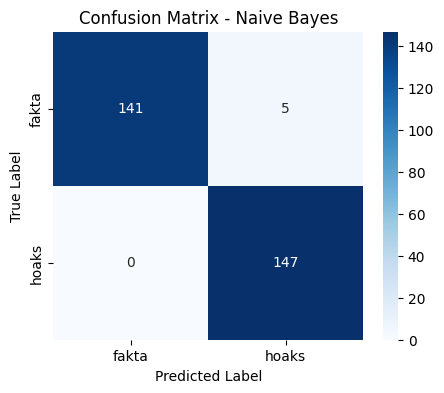


✅ Model dan vectorizer berhasil disimpan (model_naivebayes.pkl, tfidf_vectorizer.pkl)

📰 Berita: Pemerintah mengumumkan vaksin gratis untuk seluruh masyarakat.
➡ Prediksi kategori: hoaks
📈 Probabilitas: [0.37011854 0.62988146]


In [5]:
# ==========================================
# 1️⃣ Import Library
# ==========================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# 2️⃣ Load Dataset Bersih
# ==========================================
# Pastikan sudah menjalankan preprocessing & simpan ke dataset_gabungan_cleaned.csv
df = pd.read_csv("dataset_gabungan_cleaned.csv")

print("Jumlah data:", len(df))
print("Kolom:", list(df.columns))
print(df.head(3))

# ==========================================
# 3️⃣ TF-IDF Vectorization (ulang, agar langsung terhubung ke model)
# ==========================================
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    sublinear_tf=True
)

X = vectorizer.fit_transform(df["cleaned_content"])
y = df["kategori"]

# ==========================================
# 4️⃣ Split Data (Training & Testing)
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\n🔹 Jumlah data latih:", X_train.shape[0])
print("🔹 Jumlah data uji:", X_test.shape[0])

# ==========================================
# 5️⃣ Training Model Naive Bayes
# ==========================================
nb = MultinomialNB()
nb.fit(X_train, y_train)

# ==========================================
# 6️⃣ Prediksi & Evaluasi
# ==========================================
y_pred = nb.predict(X_test)

print("\n📊 Hasil Evaluasi Naive Bayes:")
print("Akurasi :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ==========================================
# 7️⃣ Confusion Matrix
# ==========================================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ==========================================
# 8️⃣ (Opsional) Simpan Model dan Vectorizer
# ==========================================
import joblib
joblib.dump(nb, "model_naivebayes.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("\n✅ Model dan vectorizer berhasil disimpan (model_naivebayes.pkl, tfidf_vectorizer.pkl)")

# ==========================================
# 9️⃣ (Opsional) Prediksi Satu Kalimat Baru
# ==========================================
def prediksi_berita(teks):
    teks_tfidf = vectorizer.transform([teks])
    hasil = nb.predict(teks_tfidf)[0]
    probabilitas = nb.predict_proba(teks_tfidf)[0]
    print(f"\n📰 Berita: {teks}")
    print(f"➡ Prediksi kategori: {hasil}")
    print(f"📈 Probabilitas: {probabilitas}")

# Contoh
prediksi_berita("Pemerintah mengumumkan vaksin gratis untuk seluruh masyarakat.")